In [ ]:
!pip install h5py pyyaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import os
import tensorflow as tf

from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
path="/content/drive/MyDrive/PPP/PlantVillage"
EPOCHS=50

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    path,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)#transforming data into a tensor

Found 2152 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


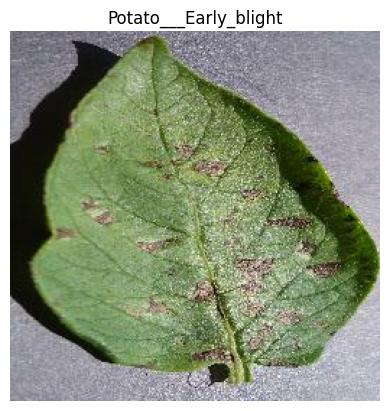

In [ ]:
for image_batch,label_batch in dataset:
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[label_batch[0]])
  plt.axis("off")

In [ ]:
train_ds=dataset.take(54)
test_ds=dataset.skip(54)
val_ds=test_ds.take(6)
test_ds=test_ds.skip(6)

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)#OPTIMISNG READING TIME
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)#OPTIMISNG READING TIME
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)#OPTIMISNG READING TIME training will run faster

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])#when u feed it later an image that is not 256*256 it reshapes it

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)

])

In [ ]:
input_shape=(32,256,256,3)
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
])
model.build(input_shape=input_shape)

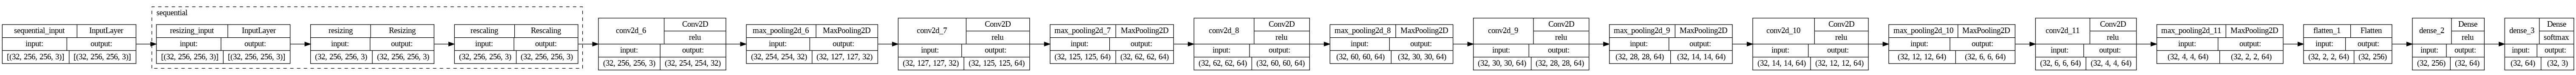

In [ ]:

dpi = max(model.output_shape) / max(a4_width_inches, a4_height_inches)

tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="LR",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
import matplotlib.pyplot as plt

# Calculate the desired width and height in inches
a4_width_inches = 8.27
a4_height_inches = 11.69

# Create a custom figure with the desired size
fig = plt.figure(figsize=(a4_width_inches, a4_height_inches))

# Generate the image
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

# Save the plot to a file
plt.savefig("model.png")


<Figure size 827x1169 with 0 Axes>

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/PPP/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
    callbacks=[cp_callback]
)

Epoch 1/10
54/54 [==============================] - ETA: 0s - loss: 0.8831 - accuracy: 0.5197
Epoch 1: saving model to /content/drive/MyDrive/PPP/cp.ckpt
54/54 [==============================] - 287s 5s/step - loss: 0.8831 - accuracy: 0.5197 - val_loss: 0.8287 - val_accuracy: 0.6406
Epoch 2/10
54/54 [==============================] - ETA: 0s - loss: 0.6666 - accuracy: 0.6875
Epoch 2: saving model to /content/drive/MyDrive/PPP/cp.ckpt
54/54 [==============================] - 266s 5s/step - loss: 0.6666 - accuracy: 0.6875 - val_loss: 0.6306 - val_accuracy: 0.7135
Epoch 3/10
54/54 [==============================] - ETA: 0s - loss: 0.5377 - accuracy: 0.7714
Epoch 3: saving model to /content/drive/MyDrive/PPP/cp.ckpt
54/54 [==============================] - 257s 5s/step - loss: 0.5377 - accuracy: 0.7714 - val_loss: 0.4771 - val_accuracy: 0.7708
Epoch 4/10
54/54 [==============================] - ETA: 0s - loss: 0.4075 - accuracy: 0.8258
Epoch 4: saving model to /content/drive/MyDrive/PPP/cp

In [ ]:
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8831236958503723,
 0.6665831208229065,
 0.5377334952354431,
 0.4075305163860321,
 0.2660835087299347]

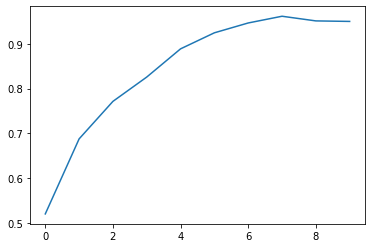

In [ ]:
plt.plot(acc)

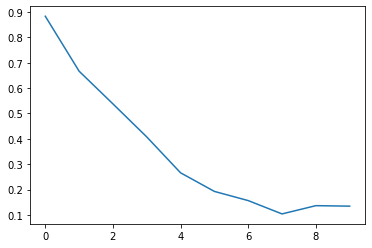

In [ ]:
plt.plot(loss)

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 2s 2s/step
predicted label: Potato___Late_blight


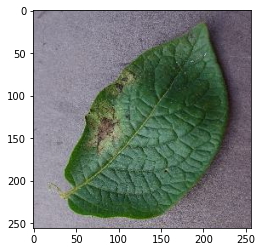

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [ ]:
checkpoint_path = "/content/drive/MyDrive/PPP/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
#loss, acc = model.evaluate(test_ds, verbose=2)
#print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 24ms/step


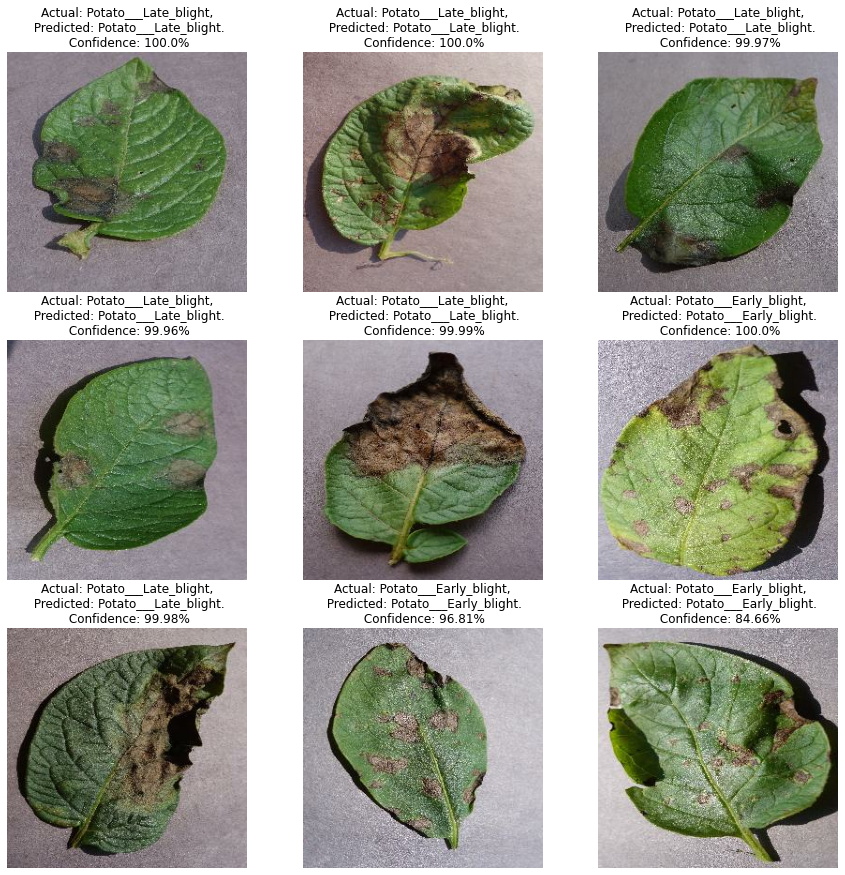

In [ ]:
import numpy as np
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")


**Trying another architecture and seeing the results**

---








In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable=False

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(3,activation='softmax')

In [ ]:
model2 = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.001
model2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


In [ ]:
input_shape=(32,256,256,3)
"""

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax'),
])
"""
model2.build(input_shape=input_shape)

In [ ]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


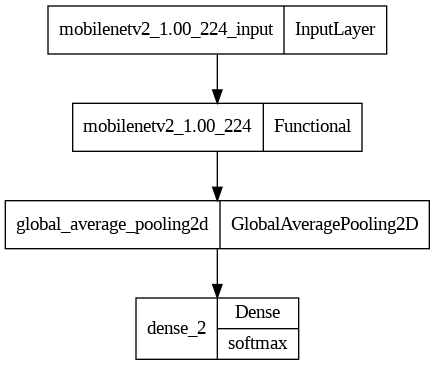

In [ ]:
tf.keras.utils.plot_model(
model2,
to_file="model.png",

show_layer_activations=True,
)

In [ ]:
checkpoint_path = "/content/drive/MyDrive/PPP/cp2.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history = model2.fit(train_ds,
                    epochs=20,
                    validation_data=val_ds)

Epoch 1/20
54/54 [==============================] - 4s 69ms/step - loss: 0.1148 - accuracy: 0.9641 - val_loss: 0.1226 - val_accuracy: 0.9688
Epoch 2/20
54/54 [==============================] - 3s 59ms/step - loss: 0.1103 - accuracy: 0.9659 - val_loss: 0.1233 - val_accuracy: 0.9531
Epoch 3/20
54/54 [==============================] - 3s 59ms/step - loss: 0.1027 - accuracy: 0.9705 - val_loss: 0.1240 - val_accuracy: 0.9635
Epoch 4/20
54/54 [==============================] - 3s 59ms/step - loss: 0.0974 - accuracy: 0.9745 - val_loss: 0.1183 - val_accuracy: 0.9583
Epoch 5/20
54/54 [==============================] - 3s 60ms/step - loss: 0.0941 - accuracy: 0.9728 - val_loss: 0.1130 - val_accuracy: 0.9635
Epoch 6/20
54/54 [==============================] - 3s 59ms/step - loss: 0.0913 - accuracy: 0.9722 - val_loss: 0.1285 - val_accuracy: 0.9531
Epoch 7/20
54/54 [==============================] - 3s 58ms/step - loss: 0.0852 - accuracy: 0.9780 - val_loss: 0.1102 - val_accuracy: 0.9688
Epoch 8/20
54

1/1 [==============================] - 0s 27ms/step


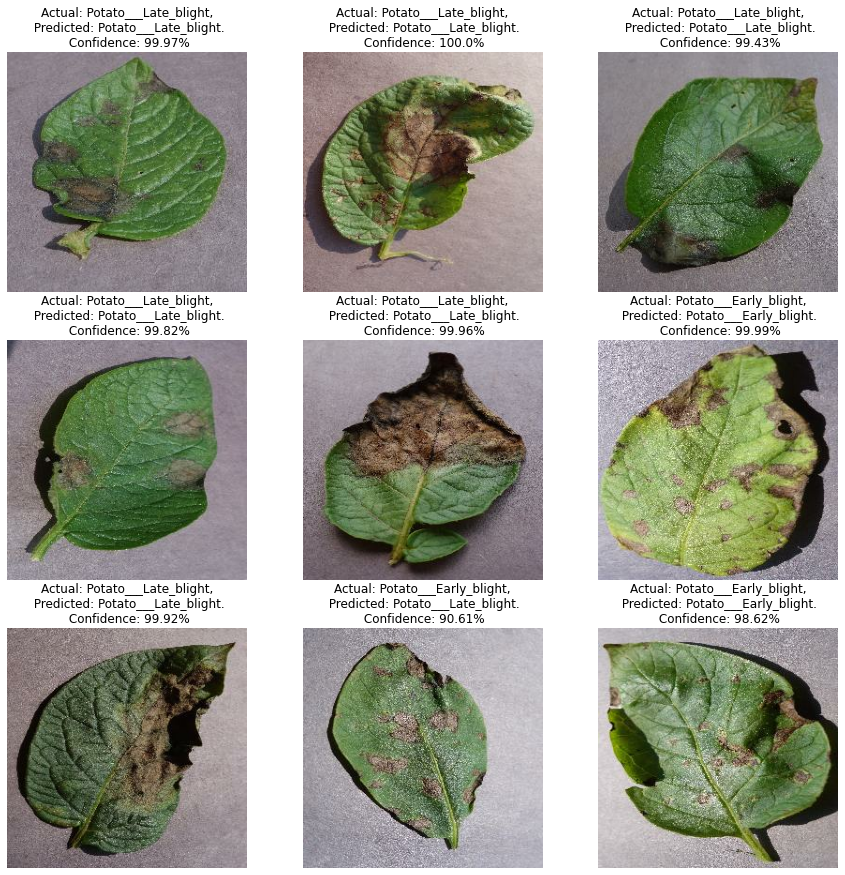

In [ ]:
import numpy as np
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model2, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

Testing transfer learning on tomato **dataset** ✈

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
path="/content/drive/MyDrive/PPP/Tomato"

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    path,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)#transforming data into a tensor

Found 4500 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
print(class_names)

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']


In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
base_model=model #loading the previous model of potato

In [ ]:
base_model.trainable=False #freezing the layers so we don t train from the beginning

**Creating a new model on top**

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(3,activation='softmax')

In [ ]:
new_model=models.Sequential([
    base_model,



]  )

In [ ]:
input_shape=(32,256,256,3)
new_model.build(input_shape=input_shape)
new_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 3)                 183747    
                                                                 
Total params: 183,747
Trainable params: 183,747
Non-trainable params: 0
_________________________________________________________________


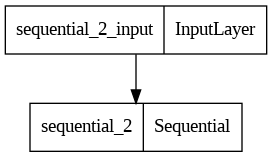

In [ ]:
tf.keras.utils.plot_model(
new_model,
to_file="model.png",

show_layer_activations=True,
)

In [ ]:
base_learning_rate = 0.001
new_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
my_layer = new_model.get_layer('sequential_2')#unfreezing the softmax layer
my_layer.trainable = True

In [ ]:
checkpoint_path = "/content/drive/MyDrive/PPP/cp3.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history = new_model.fit(train_ds,
                    epochs=5,
                    validation_data=val_ds)

Epoch 1/5
54/54 [==============================] - 8s 142ms/step - loss: 0.1096 - accuracy: 0.9595 - val_loss: 0.4581 - val_accuracy: 0.8750
Epoch 2/5
54/54 [==============================] - 9s 164ms/step - loss: 0.1985 - accuracy: 0.9421 - val_loss: 0.2587 - val_accuracy: 0.9271
Epoch 3/5
54/54 [==============================] - 10s 171ms/step - loss: 0.1172 - accuracy: 0.9659 - val_loss: 0.1846 - val_accuracy: 0.9531
Epoch 4/5
54/54 [==============================] - 8s 137ms/step - loss: 0.1212 - accuracy: 0.9688 - val_loss: 0.1337 - val_accuracy: 0.9531
Epoch 5/5
54/54 [==============================] - 9s 161ms/step - loss: 0.1049 - accuracy: 0.9682 - val_loss: 0.2739 - val_accuracy: 0.9062


1/1 [==============================] - 0s 23ms/step


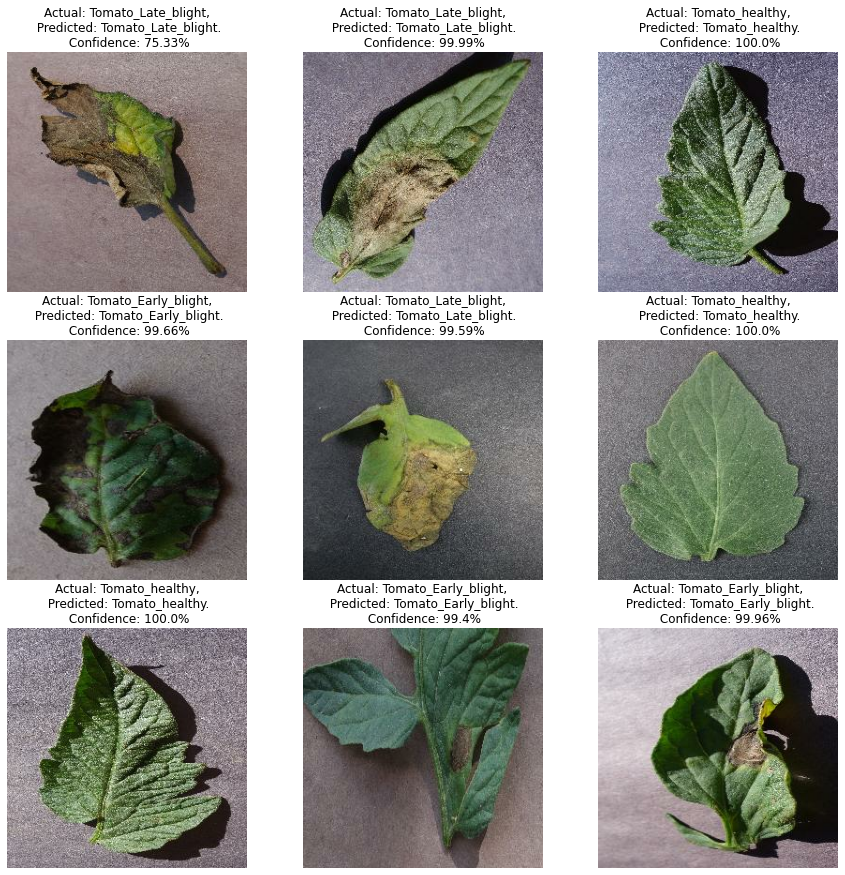

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(new_model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")